# Udacity project - write a data science blog post

## 1. Project understanding

- This project will be based on 2017 Stack Overflow annual survey. The survey includes answers from thousands of developers covering topics like programming languages, code style, salary, opinions, and advices.
- The main goal of this analysis is get some insights regarding the importance of some soft skills and formal education.

## 2. Data understanding

- In this section I will make an exploratory analysis of the 2017 Stack Overflow survey

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from collections import defaultdict
%matplotlib inline

In [46]:
df_answ = pd.read_csv('survey_results_public.csv')
df_quest = pd.read_csv('survey_results_schema.csv')

### Survey Questions
- Before diving deep into the survey, let's understand the questions. I read all questions before explore the results of the survey

In [3]:
df_quest.shape

(154, 2)

In [4]:
df_quest['Question'][153]

'You said before that you are currently learning how to program. When you have completed your studies, what annual salary do you expect to earn in your first job after graduation?'

In [5]:
df_answ.iloc[:5,149:154]

,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,Agree,Disagree,Agree,113750.0,NaN
3,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [6]:
df_answ['SurveyLong'].value_counts()

Somewhat agree       11257
Disagree              8488
Agree                 8061
Strongly agree        5854
Strongly disagree     1060
Name: SurveyLong, dtype: int64

-  After analyzing all questions, I believe the questions below are insightful for my post.

In [7]:
['8) '+ df_quest['Question'][8],
'9) '+ df_quest['Question'][9],
'11) '+ df_quest['Question'][11],
'12) '+ df_quest['Question'][12],
'13) '+ df_quest['Question'][13],
'17) '+ df_quest['Question'][17],
'18) '+ df_quest['Question'][18],
'20) '+ df_quest['Question'][20],
'23) '+ df_quest['Question'][23],
'25) '+ df_quest['Question'][25],
'29) '+ df_quest['Question'][29],
'43) '+ df_quest['Question'][43],
'78) '+ df_quest['Question'][78],
'104) '+ df_quest['Question'][104],
'129) '+ df_quest['Question'][129],
'30) '+ df_quest['Question'][30],
'31) '+ df_quest['Question'][31],
'32) '+ df_quest['Question'][32],
'34) '+ df_quest['Question'][34],
'61) '+ df_quest['Question'][61],
'38) '+ df_quest['Question'][38],
'40) '+ df_quest['Question'][40],
'41) '+ df_quest['Question'][41],
'46) '+ df_quest['Question'][46],
'58) '+ df_quest['Question'][58],
'69) '+ df_quest['Question'][69],
'70) '+ df_quest['Question'][70],
'71) '+ df_quest['Question'][71],
'106) '+ df_quest['Question'][106],
'74) '+ df_quest['Question'][74],
'75) '+ df_quest['Question'][75],
'76) '+ df_quest['Question'][76],
'82) '+ df_quest['Question'][82],
'83) '+ df_quest['Question'][83],
'80) '+ df_quest['Question'][80],
'88) '+ df_quest['Question'][88],
'152) '+ df_quest['Question'][152]]

['8) How often do you work from home or remotely?',
 '9) In terms of the number of employees, how large is the company or organization you work for?',
 '11) How long has it been since you first learned how to program?',
 '12) For how many years have you coded as part of your job?',
 '13) For how many years did you code as part of your job?',
 '17) Which of the following describe you?',
 '18) Career satisfaction rating',
 "20) You said before that you used to code as part of your job, but no longer do. To what extent do you agree or disagree with the following statements? If money weren't an issue, I would take a coding job again",
 '23) You said before that you used to code as part of your job, but no longer do. To what extent do you agree or disagree with the following statements? My career is going the way I thought it would 10 years ago',
 "25) You said before that you used to code as part of your job, but no longer do. To what extent do you agree or disagree with the following stat

## 3. Data preparation, modeling, and visualization

### Chart #1 - Problem solving skills
- A group of questions are related to 'problem solving' skills. This is a very interesting topic for my post, therefore I will explore those questions and prepare an appealing chart.

In [8]:
df_answ.shape

(51392, 154)

In [9]:
df_answ.iloc[:,29].value_counts() / df_answ.iloc[:,29].count()

Strongly agree       0.576487
Agree                0.354201
Somewhat agree       0.060397
Disagree             0.005720
Strongly disagree    0.003196
Name: ProblemSolving, dtype: float64

In [10]:
df_answ.iloc[:,43].value_counts() / df_answ.iloc[:,43].count()

Agree                0.471150
Strongly agree       0.383003
Somewhat agree       0.124794
Disagree             0.017016
Strongly disagree    0.004036
Name: ChallengeMyself, dtype: float64

In [11]:
df_answ.iloc[:,104].value_counts() / df_answ.iloc[:,104].count()

Somewhat agree       0.339829
Agree                0.330522
Disagree             0.179204
Strongly agree       0.109659
Strongly disagree    0.040786
Name: EnjoyDebugging, dtype: float64

In [12]:
df_answ.iloc[:,78].value_counts() / df_answ.iloc[:,78].count()

Important               0.446768
Very important          0.347592
Somewhat important      0.164582
Not very important      0.032825
Not at all important    0.008233
Name: ImportantHiringGettingThingsDone, dtype: float64

In [13]:
prob_solv_df = df_answ.iloc[:,[29,43,78,104]]
prob_solv_df.head()

,ProblemSolving,ChallengeMyself,ImportantHiringGettingThingsDone,EnjoyDebugging
0,Strongly agree,Agree,Very important,NaN
1,NaN,NaN,Very important,Agree
2,Strongly agree,Agree,NaN,Agree
3,Strongly agree,Strongly agree,Very important,Somewhat agree
4,NaN,NaN,NaN,NaN


- Considering the column 'ImportantHiringGettingThingsDone' have different concepts, but with similar meaning, I will create a new column with the same concepts of other columns

In [14]:
prob_solv_df['GettingThingsDone_new'] = prob_solv_df['ImportantHiringGettingThingsDone'].replace('Very important', 'Strongly agree').replace('Important', 'Agree').replace('Somewhat important', 'Somewhat agree').replace('Not very important', 'Disagree').replace('Not at all important', 'Strongly disagree')

C:\Users\ROLD003\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
prob_solv_df.head()

,ProblemSolving,ChallengeMyself,ImportantHiringGettingThingsDone,EnjoyDebugging,GettingThingsDone_new
0,Strongly agree,Agree,Very important,NaN,Strongly agree
1,NaN,NaN,Very important,Agree,Strongly agree
2,Strongly agree,Agree,NaN,Agree,NaN
3,Strongly agree,Strongly agree,Very important,Somewhat agree,Strongly agree
4,NaN,NaN,NaN,NaN,NaN


In [16]:
prob_solv_df = prob_solv_df.drop(['ImportantHiringGettingThingsDone'], axis=1)
prob_solv_df.head()

,ProblemSolving,ChallengeMyself,EnjoyDebugging,GettingThingsDone_new
0,Strongly agree,Agree,NaN,Strongly agree
1,NaN,NaN,Agree,Strongly agree
2,Strongly agree,Agree,Agree,NaN
3,Strongly agree,Strongly agree,Somewhat agree,Strongly agree
4,NaN,NaN,NaN,NaN


- I will create the scale of the concepts to use in the bar chart

In [17]:
agr_scale = ['Strongly agree', 'Agree', 'Somewhat agree', 'Disagree', 'Strongly disagree']
agr_classes = pd.api.types.CategoricalDtype(ordered=True, categories=agr_scale)

prob_solv_df.iloc[:,:] = prob_solv_df.iloc[:,:].astype(agr_classes)

In [18]:
prob_solv_df.head()

,ProblemSolving,ChallengeMyself,EnjoyDebugging,GettingThingsDone_new
0,Strongly agree,Agree,NaN,Strongly agree
1,NaN,NaN,Agree,Strongly agree
2,Strongly agree,Agree,Agree,NaN
3,Strongly agree,Strongly agree,Somewhat agree,Strongly agree
4,NaN,NaN,NaN,NaN


- I will create a new DataFrame to see the answers of each question by group (in % total of the column)

In [19]:
PS = prob_solv_df['ProblemSolving'].value_counts() / prob_solv_df['ProblemSolving'].count()
PS = pd.DataFrame(data=PS, columns=['ProblemSolving']).reset_index()
PS

,index,ProblemSolving
0,Strongly agree,0.576487
1,Agree,0.354201
2,Somewhat agree,0.060397
3,Disagree,0.005720
4,Strongly disagree,0.003196


In [20]:
CM = prob_solv_df['ChallengeMyself'].value_counts() / prob_solv_df['ChallengeMyself'].count()
CM = pd.DataFrame(data=CM, columns=['ChallengeMyself']).reset_index()
CM

,index,ChallengeMyself
0,Agree,0.471150
1,Strongly agree,0.383003
2,Somewhat agree,0.124794
3,Disagree,0.017016
4,Strongly disagree,0.004036


In [21]:
ED = prob_solv_df['EnjoyDebugging'].value_counts() / prob_solv_df['EnjoyDebugging'].count()
ED = pd.DataFrame(data=ED, columns=['EnjoyDebugging']).reset_index()
ED

,index,EnjoyDebugging
0,Somewhat agree,0.339829
1,Agree,0.330522
2,Disagree,0.179204
3,Strongly agree,0.109659
4,Strongly disagree,0.040786


In [22]:
GTD = prob_solv_df['GettingThingsDone_new'].value_counts() / prob_solv_df['GettingThingsDone_new'].count()
GTD = pd.DataFrame(data=GTD, columns=['GettingThingsDone_new']).reset_index()
GTD = GTD.rename(columns={'GettingThingsDone_new': 'GettingThingsDone'})
GTD

,index,GettingThingsDone
0,Agree,0.446768
1,Strongly agree,0.347592
2,Somewhat agree,0.164582
3,Disagree,0.032825
4,Strongly disagree,0.008233


In [23]:
prob_solv_perc_df = PS.merge(CM, how='left').merge(ED, how='left').merge(GTD, how='left')
prob_solv_perc_df

,index,ProblemSolving,ChallengeMyself,EnjoyDebugging,GettingThingsDone
0,Strongly agree,0.576487,0.383003,0.109659,0.347592
1,Agree,0.354201,0.471150,0.330522,0.446768
2,Somewhat agree,0.060397,0.124794,0.339829,0.164582
3,Disagree,0.005720,0.017016,0.179204,0.032825
4,Strongly disagree,0.003196,0.004036,0.040786,0.008233


- I will create a bar chart to support my arguments that 'problem solving' skills are important to learn coding

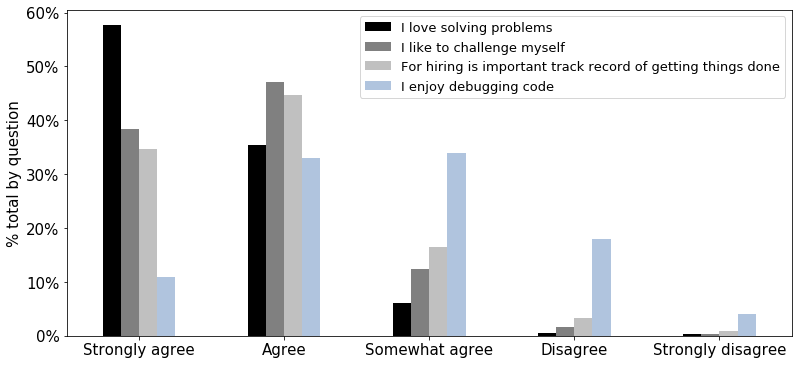

In [24]:
prob_solv_perc_df.plot(x='index', y=['ProblemSolving', 'ChallengeMyself', 'GettingThingsDone', 'EnjoyDebugging'], 
                       kind="bar", color=['black', 'grey', 'silver', 'lightsteelblue'], figsize=[13,6],
                       label = ['I love solving problems', 'I like to challenge myself', 'For hiring is important track record of getting things done', 'I enjoy debugging code']);
plt.xticks(rotation=0, size=15);
yticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
yticks_new = ['0%', '10%', '20%', '30%', '40%', '50%', '60%']
plt.yticks(yticks, yticks_new, size=15);
plt.xlabel('');
plt.ylabel('% total by question', size=15);
plt.legend(fontsize=13);

### Chart #2 - Communication skills
- 2 questions raised the importance of communication skills. I decided to include this topic in my post.

In [25]:
['71) '+ df_quest['Question'][71],
'106) '+ df_quest['Question'][106]]

["71) Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Communication skills",
 '106) I have difficulty communicating my ideas to my peers']

In [26]:
com_hir = df_answ.iloc[:,71].value_counts() / df_answ.iloc[:,71].count()
com_hir = pd.DataFrame(com_hir).reset_index().rename(columns={'index': 'scale'})
com_hir

,scale,ImportantHiringCommunication
0,Important,0.458675
1,Very important,0.341318
2,Somewhat important,0.165858
3,Not very important,0.028981
4,Not at all important,0.005168


In [27]:
agr_scale2 = ['Very important', 'Important', 'Somewhat important', 'Not very important', 'Not at all important']
agr_classes2 = pd.api.types.CategoricalDtype(ordered=True, categories=agr_scale2)
com_hir['scale'] = com_hir['scale'].astype(agr_classes2)

com_hir = com_hir.sort_values('scale')
com_hir

,scale,ImportantHiringCommunication
1,Very important,0.341318
0,Important,0.458675
2,Somewhat important,0.165858
3,Not very important,0.028981
4,Not at all important,0.005168


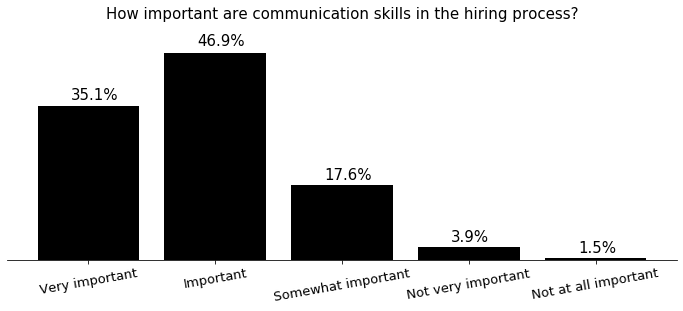

In [28]:
scale = com_hir['scale']
hiring = com_hir['ImportantHiringCommunication']
fig, ax = plt.subplots(figsize =(12, 4))
ax.bar(scale, hiring, color='black')
for i in ax.patches: 
    height = i.get_height() + 0.01
    plt.text(i.get_x() + i.get_width() - 0.54, 1.01*height,
                '{:0.1f}%'.format(100*height), fontsize=15) 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(fontsize=13, rotation=10)
plt.yticks([]);
plt.title('How important are communication skills in the hiring process?', fontsize=15, y=1.08);

In [29]:
com_diff = df_answ.iloc[:,106].value_counts() / df_answ.iloc[:,106].count()
com_diff = pd.DataFrame(com_diff).reset_index().rename(columns={'index': 'scale'})
com_diff

,scale,DifficultCommunication
0,Disagree,0.498819
1,Somewhat agree,0.215587
2,Strongly disagree,0.178475
3,Agree,0.085796
4,Strongly agree,0.021323


In [30]:
agr_scale = ['Strongly agree', 'Agree', 'Somewhat agree', 'Disagree', 'Strongly disagree']
agr_classes = pd.api.types.CategoricalDtype(ordered=True, categories=agr_scale)
com_diff['scale'] = com_diff['scale'].astype(agr_classes)

com_diff = com_diff.sort_values('scale')
com_diff

,scale,DifficultCommunication
4,Strongly agree,0.021323
3,Agree,0.085796
1,Somewhat agree,0.215587
0,Disagree,0.498819
2,Strongly disagree,0.178475


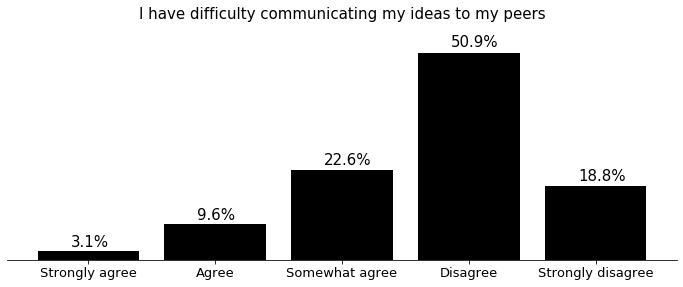

In [31]:
scale = com_diff['scale']
communic = com_diff['DifficultCommunication']
fig, ax = plt.subplots(figsize =(12, 4))
ax.bar(scale, communic, color='black')
for i in ax.patches: 
    height = i.get_height() + 0.01
    plt.text(i.get_x() + i.get_width() - 0.54, 1.01*height,
                '{:0.1f}%'.format(100*height), fontsize=15) 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(fontsize=13, rotation=0)
plt.yticks([]);
plt.title('I have difficulty communicating my ideas to my peers', fontsize=15, y=1.08);

### Chart #3 - Formal education
- The formal education determined the professional success of the developers?

In [32]:
['76) '+ df_quest['Question'][76],
'82) '+ df_quest['Question'][82],
'83) '+ df_quest['Question'][83]]

["76) Congratulations! You've just been put in charge of technical recruiting at Globex, a multinational high- tech firm. This job comes with a corner office, and you have an experienced staff of recruiters at your disposal. They want to know what they should prioritize when recruiting software developers. How important should each of the following be in Globex's hiring process? Educational credentials (e.g. schools attended, specific field of study, grades earned)",
 '82) Overall, how important has your formal schooling and education been to your career success?',
 '83) Outside of your formal schooling and education, which of the following have you done?']

In [33]:
df_answ.iloc[:,76].value_counts()

Somewhat important      11034
Not very important       8282
Important                5423
Not at all important     2908
Very important           1016
Name: ImportantHiringEducation, dtype: int64

In [34]:
df_answ.iloc[:,82].value_counts()

Somewhat important      6289
Important               5861
Not very important      4795
Very important          3716
Not at all important    2694
Name: EducationImportant, dtype: int64

In [35]:
df_answ.iloc[:,83].value_counts()

Self-taught                                                                                                                                    3691
Online course; Self-taught                                                                                                                     1875
Self-taught; Open source contributions                                                                                                         1751
On-the-job training; Self-taught                                                                                                               1687
Online course; On-the-job training; Self-taught                                                                                                1276
                                                                                                                                               ... 
Bootcamp; Part-time/evening course; Industry certification; On-the-job training; Self-taught; Coding competition

In [36]:
formal_edu = df_answ.iloc[:,82].value_counts() / df_answ.iloc[:,82].count()
formal_edu = pd.DataFrame(formal_edu).reset_index().rename(columns={'index': 'scale'})
formal_edu

,scale,EducationImportant
0,Somewhat important,0.269279
1,Important,0.250953
2,Not very important,0.205309
3,Very important,0.159109
4,Not at all important,0.115350


In [37]:
agr_scale2 = ['Very important', 'Important', 'Somewhat important', 'Not very important', 'Not at all important']
agr_classes2 = pd.api.types.CategoricalDtype(ordered=True, categories=agr_scale2)
formal_edu['scale'] = formal_edu['scale'].astype(agr_classes2)

formal_edu = formal_edu.sort_values('scale')
formal_edu

,scale,EducationImportant
3,Very important,0.159109
1,Important,0.250953
0,Somewhat important,0.269279
2,Not very important,0.205309
4,Not at all important,0.115350


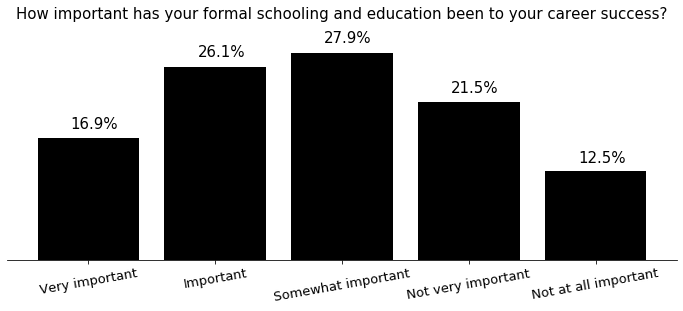

In [38]:
scale = formal_edu['scale']
education = formal_edu['EducationImportant']
fig, ax = plt.subplots(figsize =(12, 4))
ax.bar(scale, education, color='black')
for i in ax.patches: 
    height = i.get_height() + 0.01
    plt.text(i.get_x() + i.get_width() - 0.54, 1.01*height,
                '{:0.1f}%'.format(100*height), fontsize=15) 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(fontsize=13, rotation=10)
plt.yticks([]);
plt.title('How important has your formal schooling and education been to your career success?', fontsize=15, y=1.08);

- For this question, I will consider only people with salary above $ 10,000

In [39]:
learn_ex_formal = df_answ.iloc[:,[83,152]]
learn_ex_formal = learn_ex_formal.dropna(subset=['Salary'], how='any')
learn_ex_formal_edu = learn_ex_formal[learn_ex_formal['Salary'] > 10000]
learn_ex_formal_edu = learn_ex_formal_edu['EducationTypes'].value_counts().reset_index().rename(columns={'index':'method', 'EducationTypes':'count'})
learn_ex_formal_edu

,method,count
0,Self-taught,739
1,On-the-job training; Self-taught,516
2,Self-taught; Open source contributions,419
3,Online course; On-the-job training; Self-taught,385
4,Online course; Self-taught,333
...,...,...
335,Industry certification; On-the-job training; C...,1
336,Part-time/evening course; Industry certificati...,1
337,Industry certification; On-the-job training; C...,1
338,Online course; Part-time/evening course; On-th...,1


In [40]:
learn_ex_formal_edu

,method,count
0,Self-taught,739
1,On-the-job training; Self-taught,516
2,Self-taught; Open source contributions,419
3,Online course; On-the-job training; Self-taught,385
4,Online course; Self-taught,333
...,...,...
335,Industry certification; On-the-job training; C...,1
336,Part-time/evening course; Industry certificati...,1
337,Industry certification; On-the-job training; C...,1
338,Online course; Part-time/evening course; On-th...,1


In [41]:
df_answ.iloc[:,83].value_counts().sample(10)

Part-time/evening course; On-the-job training; Self-taught; Open source contributions                                                    69
Online course; Bootcamp; Part-time/evening course; Industry certification; On-the-job training; Hackathon; Open source contributions      1
Bootcamp; Part-time/evening course; Industry certification; On-the-job training                                                           1
Coding competition                                                                                                                       87
Online course; Industry certification                                                                                                    28
Industry certification; On-the-job training; Coding competition; Open source contributions                                                1
Online course; Bootcamp; Part-time/evening course; Industry certification; On-the-job training; Self-taught; Hackathon                    8
Online course; Part-

- Considering this is a multiple choice question, I have to group the answers by term

In [42]:
ex_formal_list = ["Self-taught", "Online course", "On-the-job training", 
                  "Open source contributions", "Hackathon", "Coding competition", 
                  "Part-time/evening course", "Industry certification", "Bootcamp"]


ex_formal_df = defaultdict(int)

for val in ex_formal_list:
    for idx in range(learn_ex_formal_edu.shape[0]):
        if val in learn_ex_formal_edu['method'][idx]:
            ex_formal_df[val] += int(learn_ex_formal_edu['count'][idx])
ex_formal_df = pd.DataFrame(pd.Series(ex_formal_df)).reset_index()
ex_formal_df.columns = ['method', 'count']
ex_formal_df.sort_values('count', ascending=False, inplace=True)

In [43]:
ex_formal_df

,method,count
0,Self-taught,7272
2,On-the-job training,3861
1,Online course,3469
3,Open source contributions,3285
4,Hackathon,2236
5,Coding competition,1768
7,Industry certification,1270
6,Part-time/evening course,956
8,Bootcamp,674


In [44]:
ex_formal_df['perc'] = ex_formal_df['count'] / ex_formal_df['count'].sum()
ex_formal_df = ex_formal_df.sort_values('perc', ascending=False)
ex_formal_df

,method,count,perc
0,Self-taught,7272,0.293332
2,On-the-job training,3861,0.155742
1,Online course,3469,0.139930
3,Open source contributions,3285,0.132508
4,Hackathon,2236,0.090194
5,Coding competition,1768,0.071316
7,Industry certification,1270,0.051228
6,Part-time/evening course,956,0.038562
8,Bootcamp,674,0.027187


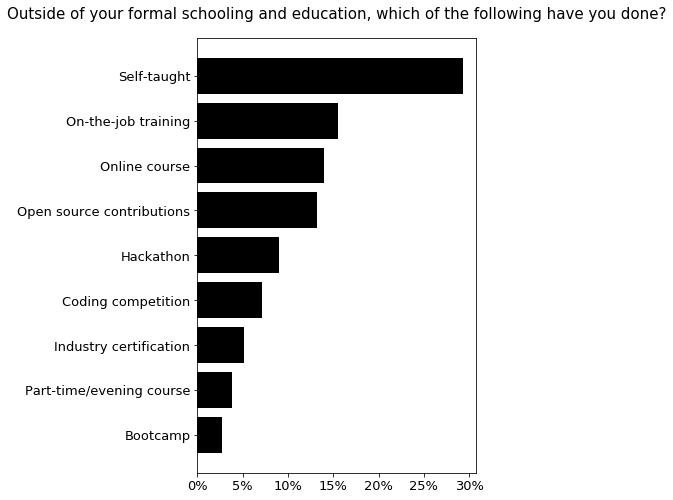

In [45]:
plt.figure(figsize=(5,8))
plt.barh(data=ex_formal_df.sort_values('perc'), y='method', width='perc', color='black')
xticks = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
xticks_new = ['0%', '5%', '10%', '15%', '20%', '25%', '30%']
plt.xticks(xticks, xticks_new, fontsize=13, rotation=0)
plt.yticks(fontsize=13);
plt.title('Outside of your formal schooling and education, which of the following have you done?', fontsize=15, y=1.03);